# Test an example Web Service

If at any point throughout the workshop you want to test out an existing service, you can play around with this one that was trained on 120 dog breeds using the ResNet18 model. It has about 81% accuracy.

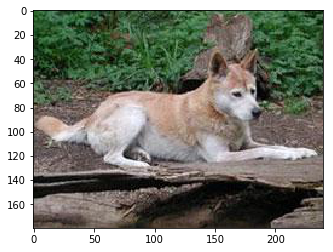

In [13]:
# importing the requests library 
import requests 
import os, json, base64
from io import BytesIO
import matplotlib.pyplot as plt
from skimage import io
from PIL import Image
import urllib.request
import io

##Get random dog
def get_random_dog():
    r = requests.get(url ="https://dog.ceo/api/breeds/image/random")
    URL= r.json()['message']
    return URL

##Get Random Dog Image
URL = get_random_dog()

##whippet Example 
# URL="https://s3.amazonaws.com/cdn-origin-etr.akc.org/wp-content/uploads/2017/11/12223018/Whippet-On-White-03.jpg"

##italian greyhound Example
# URL="https://s3.amazonaws.com/cdn-origin-etr.akc.org/wp-content/uploads/2017/11/12231757/Italian-Greyhound-On-White-03.jpg"

##chihuahua Example
# URL ="https://s3.amazonaws.com/cdn-origin-etr.akc.org/wp-content/uploads/2017/11/12213613/Chihuahua-onWhite-13.jpg"

with urllib.request.urlopen(URL) as url:
    test_img = io.BytesIO(url.read())

# ## If you downloaded the dataset, you can try this arbitrary image from the test dataset
# # test_img = os.path.join('breeds-10', 'val', 'n02085620-Chihuahua', 'n02085620_1271.jpg') 

plt.imshow(Image.open(test_img))


In [14]:

def imgToBase64(img):
    """Convert pillow image to base64-encoded image"""
    imgio = BytesIO()
    img.save(imgio, 'JPEG')
    img_str = base64.b64encode(imgio.getvalue())
    return img_str.decode('utf-8')

base64Img = imgToBase64(Image.open(test_img))
# api-endpoint 
scoringURI = "http://137.117.58.22:80/score"

data = {'data':base64Img} 
headers = {'content-type': 'application/json'}
    
# sending post request and saving response as response object 
r = requests.post(url = scoringURI, data=json.dumps(data), headers=headers)
r.json()

'{"label": "dingo", "probability": "0.8049711"}'